# External data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
df = pd.read_csv('telco_final.csv')

df

,Unnamed: 0,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
0,0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,...,0.00,59.65,3,Churned,Yes,1,Competitor,Competitor offered more data,64147.0,5.4%
1,1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,...,390.80,1024.10,3,Churned,Yes,1,Competitor,Competitor made better offer,52008.0,6.9%
2,2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,...,203.94,1910.88,2,Churned,Yes,1,Competitor,Competitor made better offer,44897.0,7.3%
3,3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,...,494.00,2995.07,2,Churned,Yes,1,Dissatisfaction,Limited range of services,23370.0,8.0%
4,4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,...,234.21,3102.36,2,Churned,Yes,1,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,Female,30,No,No,No,No,0,United States,...,1639.44,3039.53,5,Stayed,No,0,NaN,NaN,2726.0,13.6%
7039,7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,...,865.20,2807.47,3,Stayed,No,0,NaN,NaN,38565.0,8.7%
7040,7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,...,2135.52,9453.04,4,Stayed,No,0,NaN,NaN,0.0,NaN
7041,7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,...,0.00,319.21,4,Stayed,No,0,NaN,NaN,500.0,NaN


## Dropping columns which are not relevant for the use case:

In [2]:
columns_to_drop = [
    'Unnamed: 0',
    'Paperless Billing',
    'Country',
    'State',
    'Under 30',
    'Senior Citizen',
    'Lat Long',
    'Churn Label',
]

df = df.drop(columns=columns_to_drop)

print(df.columns)


Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Quarter                            7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

In [4]:
df = df.drop_duplicates()
df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
0,8779-QRDMV,Male,78,No,No,0,Los Angeles,90022,34.023810,-118.156582,...,20,0.00,59.65,3,Churned,1,Competitor,Competitor offered more data,64147.0,5.4%
1,7495-OOKFY,Female,74,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,...,0,390.80,1024.10,3,Churned,1,Competitor,Competitor made better offer,52008.0,6.9%
2,1658-BYGOY,Male,71,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,...,0,203.94,1910.88,2,Churned,1,Competitor,Competitor made better offer,44897.0,7.3%
3,4598-XLKNJ,Female,78,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,...,0,494.00,2995.07,2,Churned,1,Dissatisfaction,Limited range of services,23370.0,8.0%
4,4846-WHAFZ,Female,80,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,...,0,234.21,3102.36,2,Churned,1,Price,Extra data charges,25949.0,5.3%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,0,Landers,92285,34.341737,-116.539416,...,0,1639.44,3039.53,5,Stayed,0,NaN,NaN,2726.0,13.6%
7039,6840-RESVB,Male,38,Yes,Yes,2,Adelanto,92301,34.667815,-117.536183,...,0,865.20,2807.47,3,Stayed,0,NaN,NaN,38565.0,8.7%
7040,2234-XADUH,Female,30,Yes,Yes,2,Amboy,92304,34.559882,-115.637164,...,0,2135.52,9453.04,4,Stayed,0,NaN,NaN,0.0,NaN
7041,4801-JZAZL,Female,32,Yes,Yes,2,Angelus Oaks,92305,34.167800,-116.864330,...,0,0.00,319.21,4,Stayed,0,NaN,NaN,500.0,NaN


In [5]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

In [6]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


## Relevant data for my use case: 

In [7]:
relevant_numerical_cols = [
    'Tenure in Months', 
    'Monthly Charge', 
    'Total Charges', 
    'Avg Monthly Long Distance Charges', 
    'Total Refunds', 
    'Total Extra Data Charges', 
    'Total Long Distance Charges', 
    'Satisfaction Score',
    'Churn Value'
]

## Dropping the negative values from the data 

In [8]:
# Dropping negative values from relevant columns:
# Remove rows with negative values in relevant numerical columns
for col in relevant_numerical_cols:
    df = df[df[col] >= 0]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   Zip Code                           7043 non-null   int64  
 8   Latitude                           7043 non-null   float64
 9   Longitude                          7043 non-null   float64
 10  Quarter                            7043 non-null   object 
 11  Referred a Friend                  7043 non-null   objec

## Handling the outliers in the relevant columns

In [10]:
#Outlier handling
for col in relevant_numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
478,3413-BMNZE,Male,71,No,No,0,Los Angeles,90037,34.002642,-118.287596,...,0,11.89,57.14,3,Joined,0,NaN,NaN,69064.0,7.7%
479,8012-SOUDQ,Female,65,No,No,0,Los Angeles,90059,33.927254,-118.249826,...,0,540.94,4379.69,4,Stayed,0,NaN,NaN,39471.0,13.2%
480,6575-SUVOI,Female,65,Yes,No,0,Los Angeles,90062,34.003553,-118.308933,...,0,765.00,2517.65,4,Stayed,0,NaN,NaN,33528.0,6.8%
482,5067-XJQFU,Male,77,Yes,No,0,Los Angeles,90067,34.057496,-118.413959,...,0,1438.14,8514.49,5,Stayed,0,NaN,NaN,2653.0,7.8%
483,1891-QRQSA,Male,71,Yes,No,0,Downey,90241,33.940884,-118.128628,...,0,1045.12,8144.12,4,Stayed,0,NaN,NaN,45341.0,6.8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,6075-SLNIL,Male,47,No,No,0,Desert Center,92239,33.889605,-115.257009,...,0,254.98,3946.18,3,Stayed,0,NaN,NaN,296.0,13.6%
7021,9347-AERRL,Male,60,Yes,No,0,Desert Hot Springs,92240,33.948558,-116.516976,...,0,831.22,1317.42,5,Stayed,0,NaN,NaN,40755.0,6.5%
7025,1471-GIQKQ,Female,37,No,No,0,Niland,92257,33.345825,-115.596574,...,0,44.98,94.93,3,Joined,0,NaN,NaN,1186.0,NaN
7034,0871-OPBXW,Female,57,No,No,0,Escondido,92027,33.141265,-116.967221,...,0,13.70,52.95,3,Joined,0,NaN,NaN,55750.0,NaN


In [11]:
# Handling missing data for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handling missing data for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [12]:
df

,Customer ID,Gender,Age,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason,Population,Unemployment Rate
478,3413-BMNZE,Male,71,No,No,0,Los Angeles,90037,34.002642,-118.287596,...,0,11.89,57.14,3,Joined,0,NaN,NaN,69064.0,7.7%
479,8012-SOUDQ,Female,65,No,No,0,Los Angeles,90059,33.927254,-118.249826,...,0,540.94,4379.69,4,Stayed,0,NaN,NaN,39471.0,13.2%
480,6575-SUVOI,Female,65,Yes,No,0,Los Angeles,90062,34.003553,-118.308933,...,0,765.00,2517.65,4,Stayed,0,NaN,NaN,33528.0,6.8%
482,5067-XJQFU,Male,77,Yes,No,0,Los Angeles,90067,34.057496,-118.413959,...,0,1438.14,8514.49,5,Stayed,0,NaN,NaN,2653.0,7.8%
483,1891-QRQSA,Male,71,Yes,No,0,Downey,90241,33.940884,-118.128628,...,0,1045.12,8144.12,4,Stayed,0,NaN,NaN,45341.0,6.8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,6075-SLNIL,Male,47,No,No,0,Desert Center,92239,33.889605,-115.257009,...,0,254.98,3946.18,3,Stayed,0,NaN,NaN,296.0,13.6%
7021,9347-AERRL,Male,60,Yes,No,0,Desert Hot Springs,92240,33.948558,-116.516976,...,0,831.22,1317.42,5,Stayed,0,NaN,NaN,40755.0,6.5%
7025,1471-GIQKQ,Female,37,No,No,0,Niland,92257,33.345825,-115.596574,...,0,44.98,94.93,3,Joined,0,NaN,NaN,1186.0,5.5%
7034,0871-OPBXW,Female,57,No,No,0,Escondido,92027,33.141265,-116.967221,...,0,13.70,52.95,3,Joined,0,NaN,NaN,55750.0,5.5%


In [13]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

## Statistical analysis

In [14]:
import matplotlib.pyplot as plt
from scipy import stats

## Central Tendency

In [15]:
# Central Tendency
print("Mean:")
print(df[relevant_numerical_cols].mean())
print("\nMedian:")
print(df[relevant_numerical_cols].median())
print("\nMode:")
print(df[relevant_numerical_cols].mode().iloc[0])


Mean:
Tenure in Months                       35.767431
Monthly Charge                         58.759493
Total Charges                        2348.749527
Avg Monthly Long Distance Charges      22.135496
Total Refunds                           0.000000
Total Extra Data Charges                0.000000
Total Long Distance Charges           764.384772
Satisfaction Score                      3.793969
Churn Value                             0.000000
dtype: float64

Median:
Tenure in Months                       35.00
Monthly Charge                         59.95
Total Charges                        1447.90
Avg Monthly Long Distance Charges      22.01
Total Refunds                           0.00
Total Extra Data Charges                0.00
Total Long Distance Charges           506.50
Satisfaction Score                      4.00
Churn Value                             0.00
dtype: float64

Mode:
Tenure in Months                     72.00
Monthly Charge                       20.05
Total Charges   

## Dispersion

In [16]:
print(df[relevant_numerical_cols].var())
print(df[relevant_numerical_cols].std())

Tenure in Months                     5.707857e+02
Monthly Charge                       9.773384e+02
Total Charges                        5.069663e+06
Avg Monthly Long Distance Charges    2.252513e+02
Total Refunds                        0.000000e+00
Total Extra Data Charges             0.000000e+00
Total Long Distance Charges          5.886407e+05
Satisfaction Score                   6.163246e-01
Churn Value                          0.000000e+00
dtype: float64
Tenure in Months                       23.891121
Monthly Charge                         31.262412
Total Charges                        2251.591241
Avg Monthly Long Distance Charges      15.008373
Total Refunds                           0.000000
Total Extra Data Charges                0.000000
Total Long Distance Charges           767.229234
Satisfaction Score                      0.785063
Churn Value                             0.000000
dtype: float64


# QQ Plot

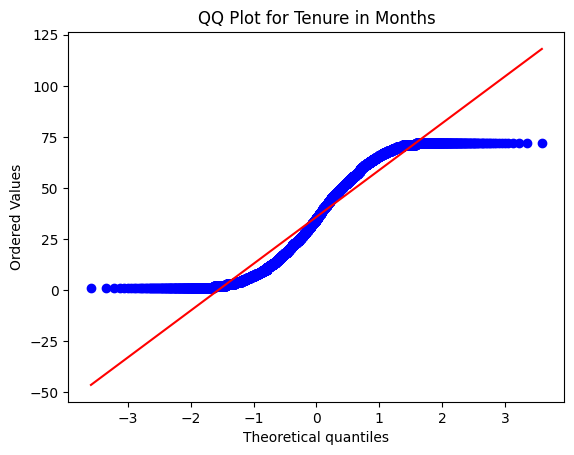

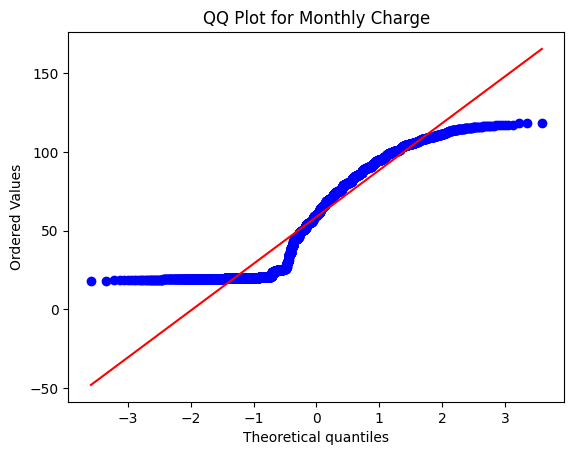

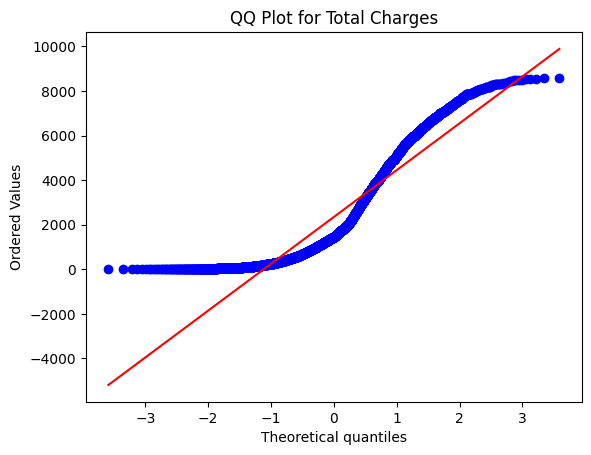

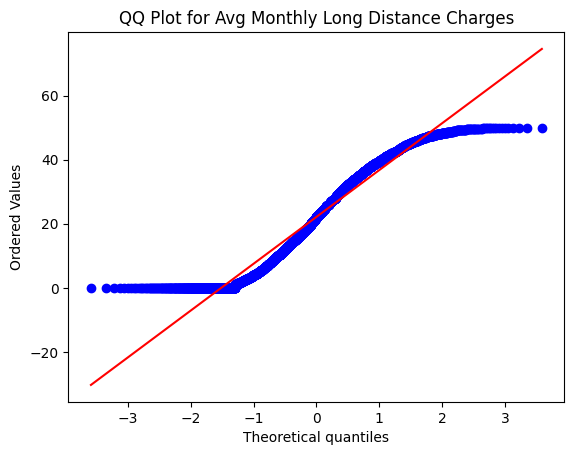

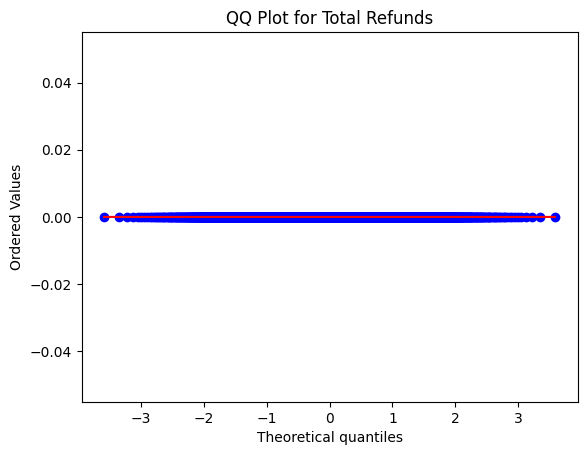

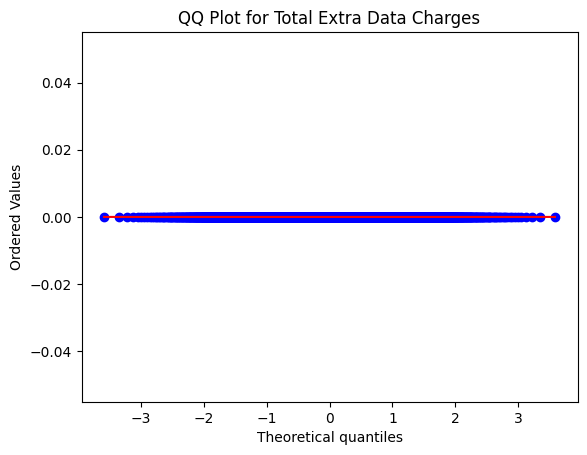

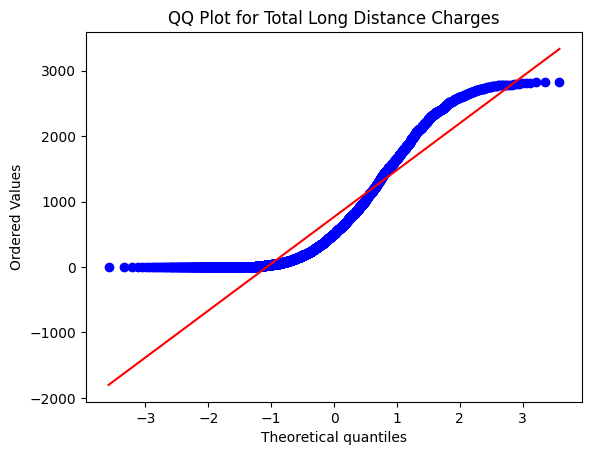

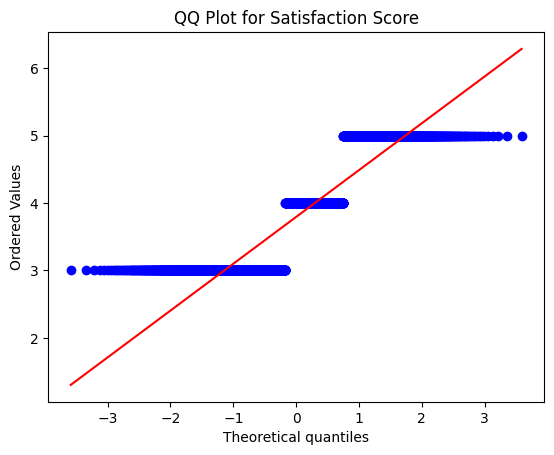

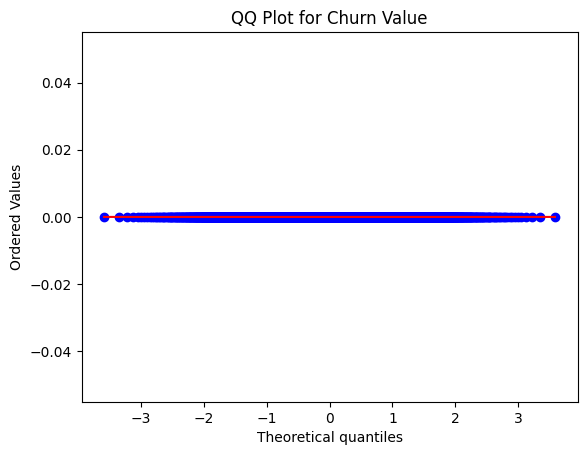

In [17]:
for col in relevant_numerical_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show() 

## Log Transformation

In [18]:
import numpy as np


# Apply log transformation
for col in relevant_numerical_cols:
    # Replace zeros with the smallest positive float
    df[col] = df[col].replace(0, np.nextafter(0, 1))
    # Apply log transformation and update the original column
    df[col] = np.log(df[col])

## Square Root Transformation

In [19]:
# Apply square root transformation
for col in relevant_numerical_cols:
    # Apply square root transformation and update the original column
    df[col] = np.sqrt(df[col])

D:\jupyter\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4145 entries, 478 to 7042
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        4145 non-null   object 
 1   Gender                             4145 non-null   object 
 2   Age                                4145 non-null   int64  
 3   Married                            4145 non-null   object 
 4   Dependents                         4145 non-null   object 
 5   Number of Dependents               4145 non-null   int64  
 6   City                               4145 non-null   object 
 7   Zip Code                           4145 non-null   int64  
 8   Latitude                           4145 non-null   float64
 9   Longitude                          4145 non-null   float64
 10  Quarter                            4145 non-null   object 
 11  Referred a Friend                  4145 non-null   object 


In [22]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Dependents',
       'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Value',
       'Churn Category', 'Churn Reason', 'Population', 'Unemployment Rate'],
      dtype='object')


## Customer Status

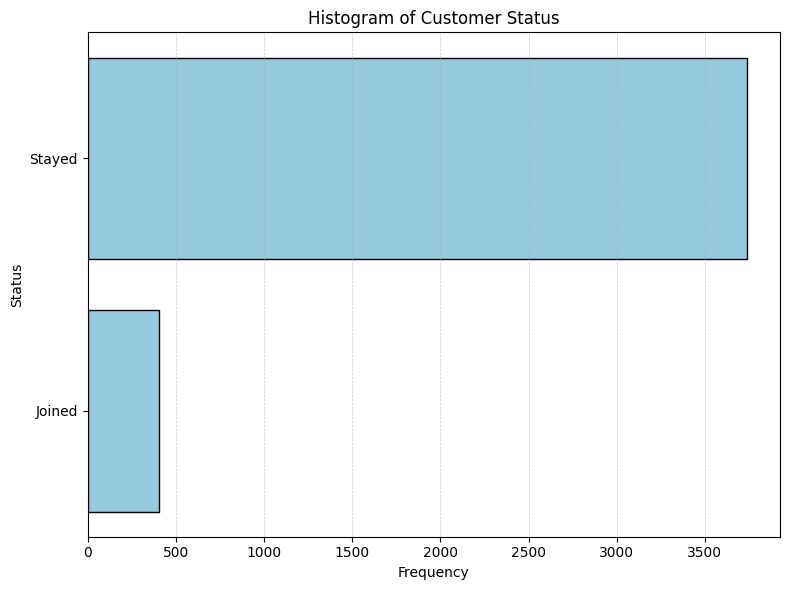

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = sns.color_palette('Blues', len(df['Customer Status'].unique()))

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Customer Status', color='skyblue', edgecolor='black', order=df['Customer Status'].value_counts().index)
plt.title('Histogram of Customer Status')
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Total and Monthly Charge Distribution

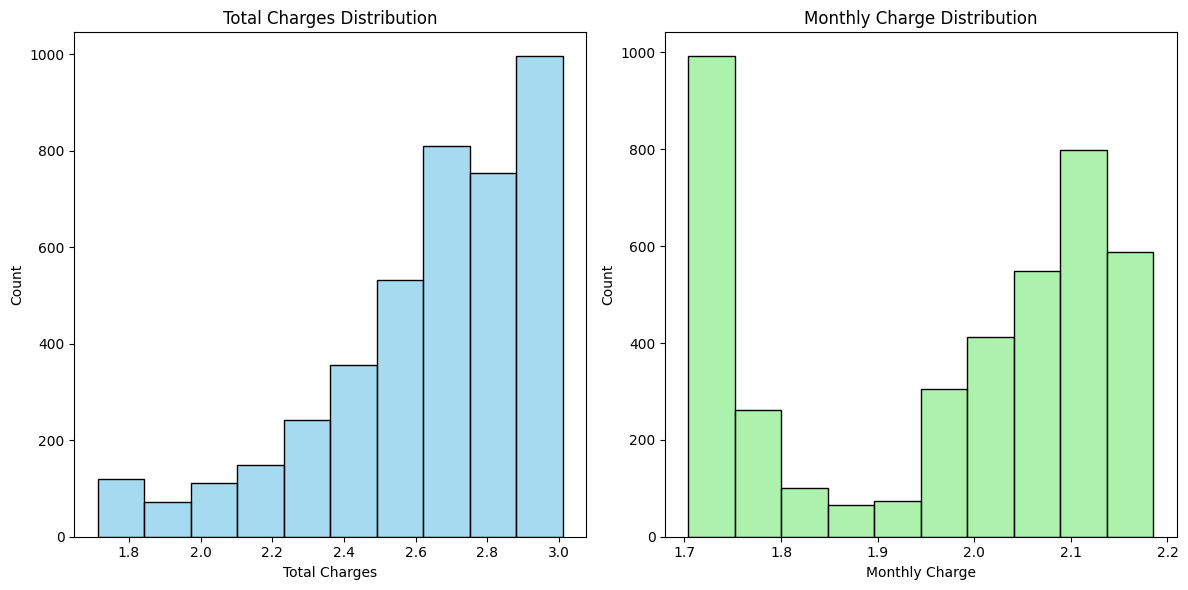

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Total Charges'], bins=10, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Total Charges Distribution')

sns.histplot(df['Monthly Charge'], bins=10, color='lightgreen', edgecolor='black', ax=axs[1])
axs[1].set_title('Monthly Charge Distribution')

plt.tight_layout()
plt.show()


## Different charges in Total Revenue

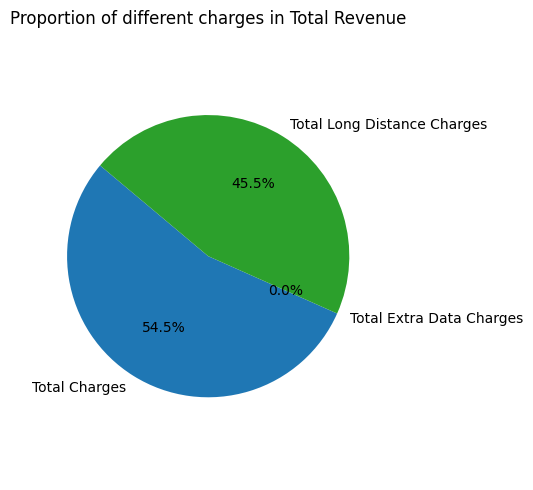

In [25]:
plt.figure(figsize=(5, 5))
labels = ['Total Charges', 'Total Extra Data Charges', 'Total Long Distance Charges']
sizes = [df['Total Charges'].sum(), df['Total Extra Data Charges'].sum(), df['Total Long Distance Charges'].sum()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of different charges in Total Revenue')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Box plots of Relevant Numerical Columns

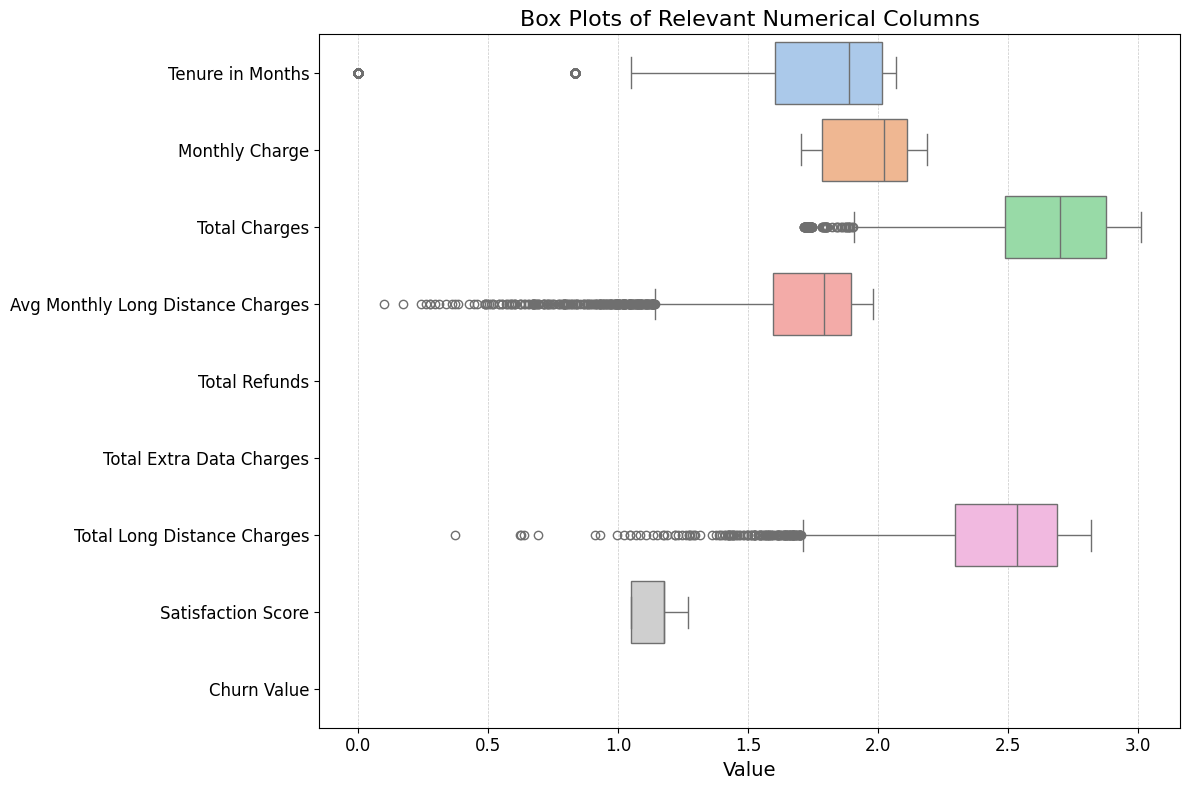

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[relevant_numerical_cols], orient='h', palette='pastel')
plt.title('Box Plots of Relevant Numerical Columns', fontsize=16)
plt.xlabel('Value', fontsize=14)
#plt.ylabel('Numerical Columns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Relationship between Total Charges and Monthly Charge

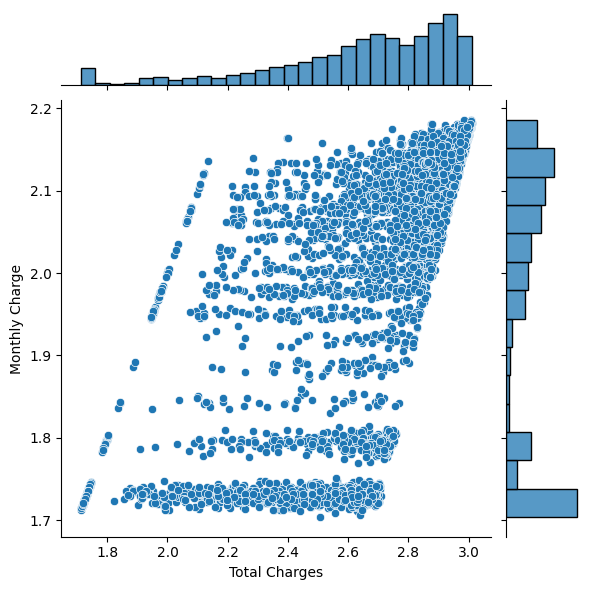

In [27]:
sns.jointplot(x='Total Charges', y='Monthly Charge', data=df, kind='scatter')
plt.show()


# Age vs Revenue

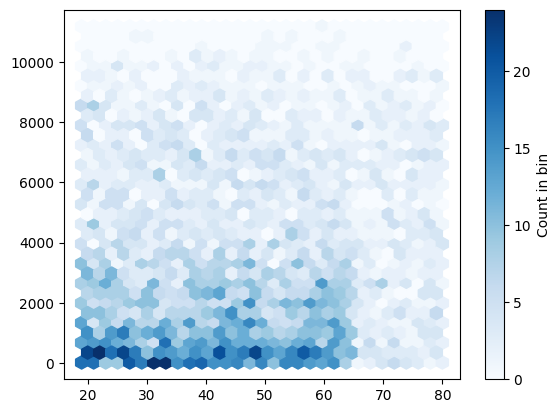

In [28]:
plt.hexbin(df['Age'], df['Total Revenue'], gridsize=30, cmap='Blues')
plt.colorbar().set_label('Count in bin')


## Distribution of Total Revenue by Contract Type

C:\Users\rahul\AppData\Local\Temp\ipykernel_18268\392562054.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Contract', y='Total Revenue', palette='pastel')


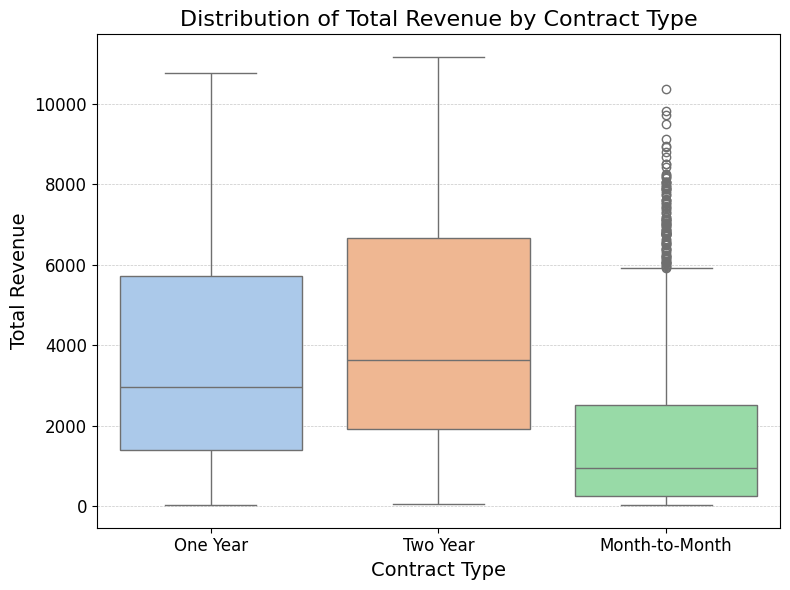

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='Total Revenue', palette='pastel')
plt.title('Distribution of Total Revenue by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Survey Responses by Internet Service Status

C:\Users\rahul\AppData\Local\Temp\ipykernel_18268\1045215240.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues', data['Satisfaction Score'].nunique())


<Figure size 1200x800 with 0 Axes>

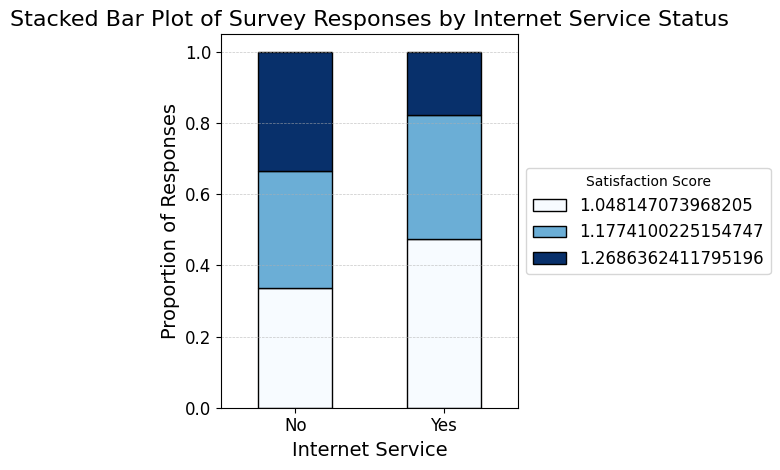

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df[['City', 'Internet Service', 'Satisfaction Score']]

cmap = plt.cm.get_cmap('Blues', data['Satisfaction Score'].nunique())

survey_proportions = data.groupby('Internet Service')['Satisfaction Score'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
survey_proportions.plot(kind='bar', stacked=True, colormap=cmap, edgecolor='black')
plt.title('Stacked Bar Plot of Survey Responses by Internet Service Status', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Proportion of Responses', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Satisfaction Score', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  
plt.show()


## Proportion of Customers with Internet Service

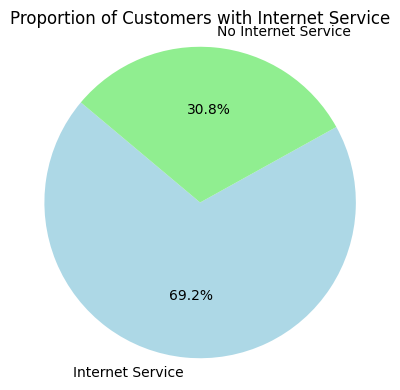

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

internet_service_customers = df[df['Internet Service'] != 'No']

no_internet_service_customers = df[df['Internet Service'] == 'No']

num_internet_service_customers = len(internet_service_customers)
num_no_internet_service_customers = len(no_internet_service_customers)
total_customers = len(df)

proportion_internet_service = num_internet_service_customers / total_customers
proportion_no_internet_service = num_no_internet_service_customers / total_customers

labels = ['Internet Service', 'No Internet Service']
sizes = [proportion_internet_service, proportion_no_internet_service]
colors = ['lightblue', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers with Internet Service')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Monthly Charge by Internet Service

C:\Users\rahul\AppData\Local\Temp\ipykernel_18268\3470608018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Internet Type', y='Monthly Charge', data=df, jitter=True, palette='Set2')


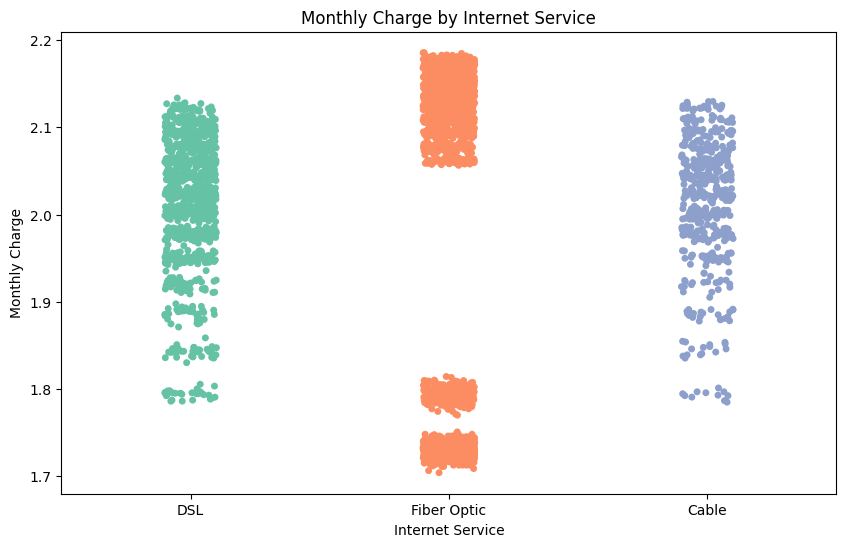

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot for Internet Service vs Monthly Charge
plt.figure(figsize=(10, 6))
sns.stripplot(x='Internet Type', y='Monthly Charge', data=df, jitter=True, palette='Set2')
plt.title('Monthly Charge by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charge')
plt.show()
